In [123]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [124]:
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest  
from numpy.random import rand
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [125]:
pd.set_option('display.float_format', lambda x:'%3f' %x)

In [126]:
%matplotlib inline

**Part** **A**

1.A.Read all the 3 CSV files as DataFrame and store them into 3 separate variable
import files for Part A

importing the datasets

In [127]:
%cd /content/gdrive/My Drive/Colab Notebooks/
df1 = pd.read_csv("Normal.csv")
df2 = pd.read_csv("Type_H.csv")
df3 = pd.read_csv("Type_S.csv")

/content/gdrive/My Drive/Colab Notebooks


1.B. Print Shape and columns of all the 3 DataFrames

In [128]:
print("Shape of Normal dataset is:", df1.shape)
print("Shape of Type H dataset is:", df2.shape)
print("Shape of Type S dataset is:", df3.shape)

Shape of Normal dataset is: (100, 7)
Shape of Type H dataset is: (60, 7)
Shape of Type S dataset is: (150, 7)


In [129]:
print("Columns of Normal dataset are:")
for col in df1.columns:
    print(col)
print("---------------------------------------------------")
print("Columns of Type H dataset are:")
for col in df2.columns:
    print(col)
print("---------------------------------------------------")
print("Columns of Type S dataset are:")
for col in df3.columns:
    print(col)

Columns of Normal dataset are:
P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class
---------------------------------------------------
Columns of Type H dataset are:
P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class
---------------------------------------------------
Columns of Type S dataset are:
P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class


1.C. Compare Column names of all the 3 DataFrames and clearly write observations

In [130]:
def compare(df_a, df_b):
    orig = set(df_a.columns)
    c = set(df_b.columns)
    if len(c) != len(df1.columns):
        return ('extra columns in dataframe')
        #if same sets
    elif (c == orig):
        return ('identical columns name')
    elif c.issubset(orig):
        return ('missing columns in dataframe')
    elif orig.issubset(c):
        return ('extra columns in dataframe')
    else:
        return ('columns names are incorrect')

print("comparing normal and type h dataset: ", compare(df1, df2))                    
print("comparing normal and type s dataset: ", compare(df1, df3))       
print("comparing type h and type s dataset: ", compare(df2, df3))        
 

comparing normal and type h dataset:  identical columns name
comparing normal and type s dataset:  identical columns name
comparing type h and type s dataset:  identical columns name


1.D.Print DataTypes of all the 3 DataFrames.

In [131]:
print("datatypes of Normal dataset: ")
df1.info()
print("--------------------------------------------")
print("datatypes of Type H dataset: ")
df2.info()
print("--------------------------------------------")
print("datatypes of Type S dataset: ")
df3.info()


datatypes of Normal dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
--------------------------------------------
datatypes of Type H dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_r

1. E. Observe and share variation in ‘Class’ feature of all the 3 DataFrames

In [132]:
#we can use value_count to see variations in Class column. Here we can see Normal spelled differently 
print("variations in Normal dataset")
df1['Class'].value_counts()

variations in Normal dataset


Normal    73
Nrmal     27
Name: Class, dtype: int64

In [133]:
# Here we can see variations in Type H dataset. Here we can see Type H value in different cases
print("variations in Type H dataset")
df2['Class'].value_counts()

variations in Type H dataset


Type_H    37
type_h    23
Name: Class, dtype: int64

In [134]:
# Here we can see variations in Type S dataset. Here we can see Type S value in different format
print("variations in Type S dataset")
df3['Class'].value_counts()

variations in Type S dataset


Type_S    133
tp_s       17
Name: Class, dtype: int64

2.** Data Preparation and Exploration**

2.A.Unify all the variations in ‘Class’ feature for all the 3 DataFrames

replace value to standardize

In [135]:
df1['Class'] = df1['Class'].replace("Nrmal", "Normal")
df1['Class'].value_counts()


Normal    100
Name: Class, dtype: int64

In [136]:
df2['Class'] = df2['Class'].replace("type_h", "Type_H")
df2['Class'].value_counts()

Type_H    60
Name: Class, dtype: int64

In [137]:
df3['Class'] = df3['Class'].replace("tp_s", "Type_S")
df3['Class'].value_counts() 

Type_S    150
Name: Class, dtype: int64

2.B. Combine all the 3 DataFrames to form a single DataFrame

In [186]:
df_in_all = pd.concat([df1,df2, df3], ignore_index=True) 
df_in_all.shape

(310, 7)

2.C. Print 5 random samples of this DataFrame

In [187]:
df_in_all.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
63,35.877571,1.112374,43.457257,34.765197,126.923906,-1.632238,Normal
253,57.286945,15.149350,64.000000,42.137595,116.735387,30.341203,Type_S
174,72.222334,23.077711,91.000000,49.144624,137.736655,56.804093,Type_S
90,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
178,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,Type_S


2.D. Print Feature-wise percentage of Null values.

In [188]:
df_in_all.isnull().sum() / df_in_all.shape[0] * 100.00

P_incidence   0.000000
P_tilt        0.000000
L_angle       0.000000
S_slope       0.000000
P_radius      0.000000
S_Degree      0.000000
Class         0.000000
dtype: float64

2.E. Check 5-point summary of the new DataFrame

In [189]:
df_in_all.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


3. Data Analysis

3.A. Visualize a heatmap to understand correlation between all features

<ipython-input-190-5a1dcc927e5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_in_all.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)


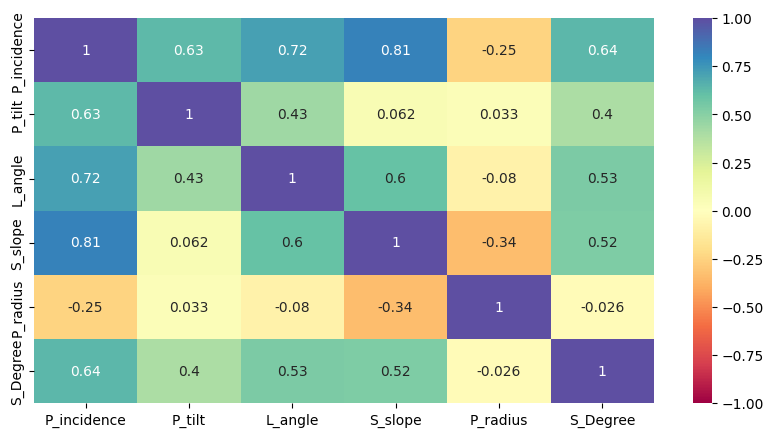

In [190]:
plt.figure(figsize=(10,5))
sns.heatmap(df_in_all.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

3. B. Share insights on correlation

p_incidence has strongest correlation with S_slope with value of 0.81
S_Degree has weakest correlation with P_radius with value of 0.026

3.D. Visualize a pairplot with 3 classes distinguished by colors and share insights

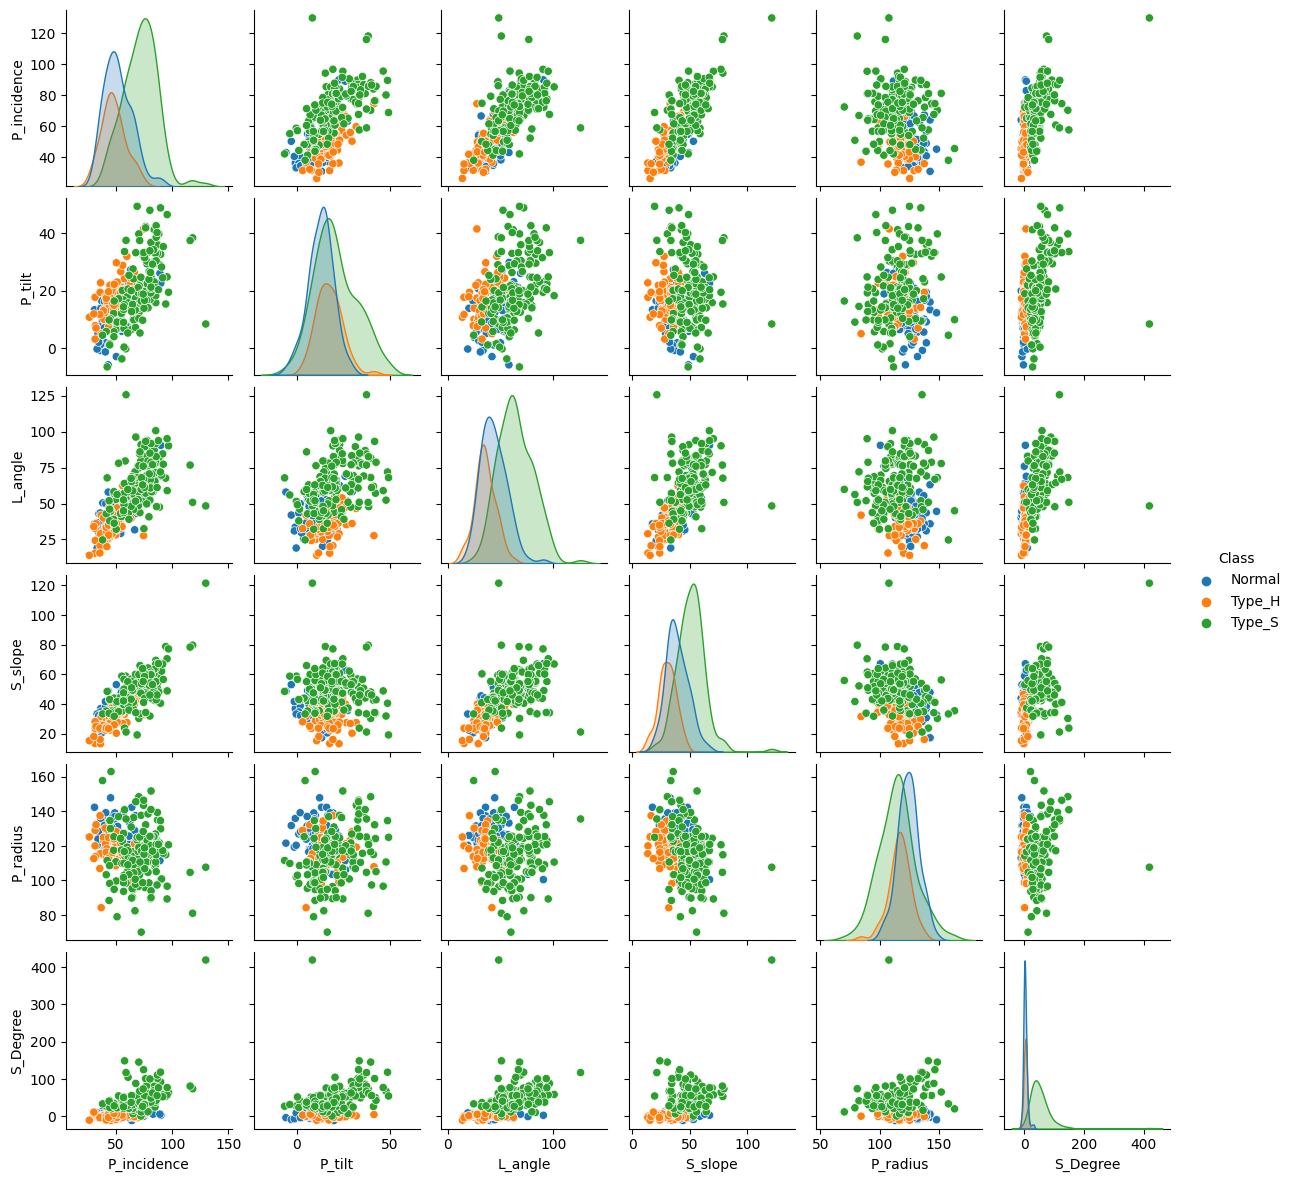

In [191]:
sns.pairplot(df_in_all, hue ='Class', height=2)

1) P_incidence has positive correlation with P_tilt, L_angle, S_slope.
2) P_tilt/S_slope have a relationship where x value is mostly constant and y values varying
3) Most of the plots are scattered heavily at centre
4) There is more data for Type_S class
5) The distribution at diagonals is varying for 3 classes

3.D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

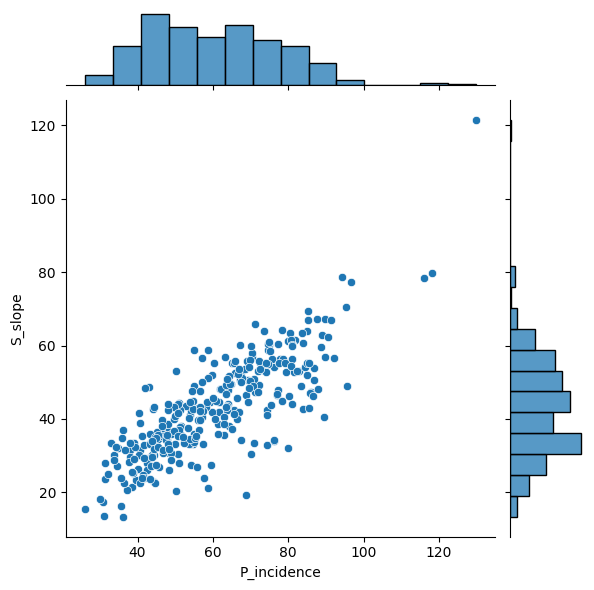

In [193]:
sns.jointplot(x = "P_incidence", y = "S_slope", data = df_in_all, kind='scatter')

There is positive correlation between both the columns. The distribution is linearly spread


3. E. Visualize a boxplot to check distribution of the features and share insights

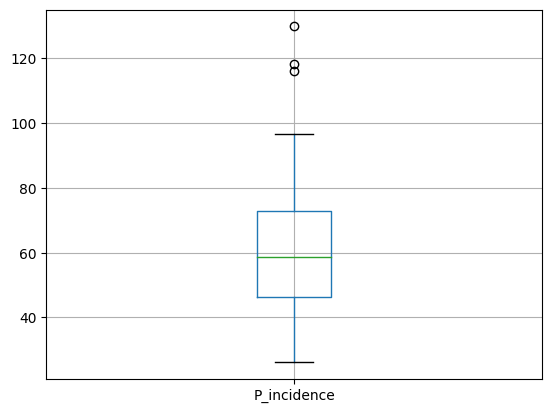

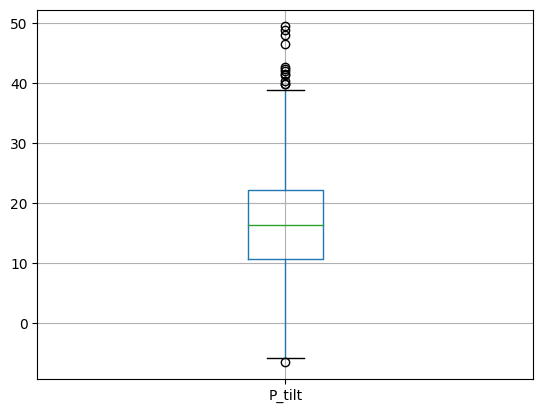

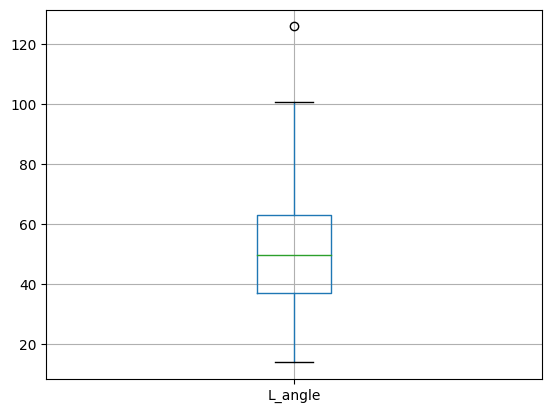

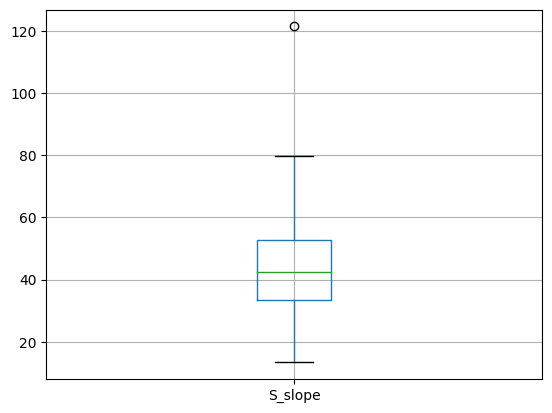

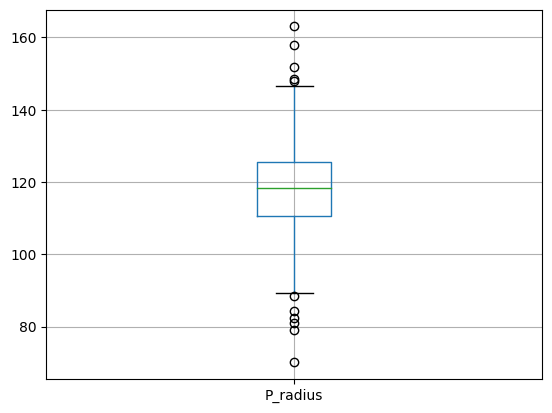

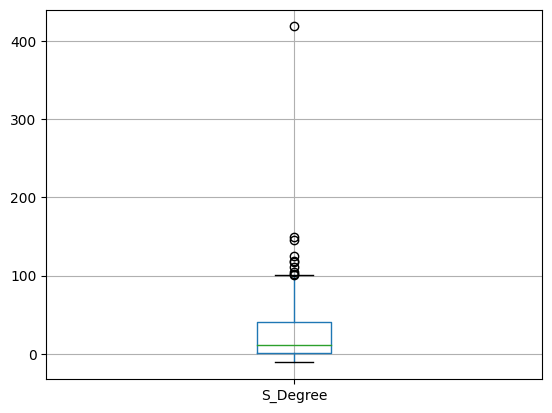

In [194]:
df_updated=df_in_all.select_dtypes(exclude=['object'])
for column in df_updated:
  plt.figure()
  df_updated.boxplot([column])

There are outliers in plot for P_tilt, P_radius, P_degree. some have outliers on only right and some have on both sides.Only column S_Degree is right skewed and others look to be normally distributed. 

4. Model Building

Data Pre-processing

In [197]:
le=LabelEncoder()
df_in_all['Class']=le.fit_transform(df_in_all['Class'])

In [198]:
df_in_all['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [199]:
df_in_all['Class']=df_in_all['Class'].astype('category')

In [200]:
list_of_df_col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']

for i in range(5):
    for col in list_of_df_col:
        quant25 = np.percentile(df_in_all[col],25)
        quant75 = np.percentile(df_in_all[col],75)
        Threshold=(quant75-quant25)*1.5
        lower=quant25-Threshold
        upper=quant75+Threshold
     
        #Considering mean of a column, but here the values are between  lower and upper cutoff
        df_include = df_in_all.loc[(df_in_all[col] >= lower) & (df_in_all[col] <= upper)]
        mean=int(df_include[col].mean())
       
        #imputing outliers with mean
        df_in_all[col]=np.where(df_in_all[col]>upper,mean,df_in_all[col])
        df_in_all[col]=np.where(df_in_all[col]<lower,mean,df_in_all[col])

4. Split data into X and Y.

In [201]:
from sklearn.model_selection import train_test_split

In [217]:
X=df_in_all.drop(['Class'], axis=1)

Y=df_in_all['Class']

4.B. Split data into train and test with 80:20 proportion

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=10)

In [219]:
print(X_train.shape)
print(y_train.shape)

(248, 6)
(248,)


In [220]:
print(X_test.shape)
print(y_test.shape)

(62, 6)
(62,)


4.C. Train a Supervised Learning Classification base model using KNN classifier

In [221]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

KNeighborsClassifier(weights='distance')

4.D. Print all the possible performance metrics for both train and test data

In [222]:
#predicted_labels = NNH.predict(X_train)
y_train_predict = NNH.predict(X_train)

#predicted_labels = NNH.predict(X_test)
y_test_predict = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7096774193548387

In [223]:
print("Train Model Accuracy::",metrics.accuracy_score(y_train,y_train_predict))

print("Test Model Accuracy::",metrics.accuracy_score(y_test, y_test_predict))

Train Model Accuracy:: 1.0
Test Model Accuracy:: 0.7096774193548387


this model is having good accuracy for train model which is 1 and for test which is 0.70

Confusion Matrix


<Axes: >

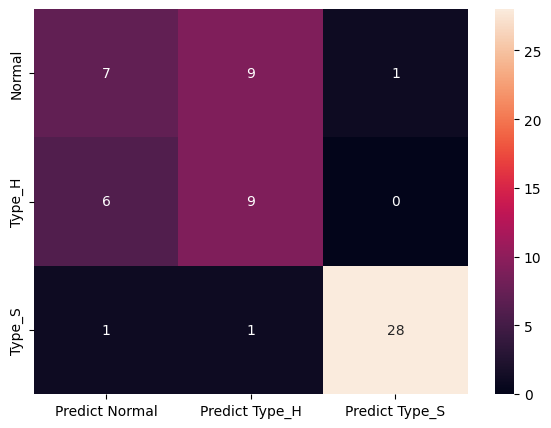

In [234]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[0, 1, 2])
df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_H", "Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H", "Predict Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

Prediction for Type_S class is higher. misclassification for other 2 classes is higher.

In [229]:
print("Classification report for test")
print(metrics.classification_report(y_test, y_test_predict))

Classification report for test
              precision    recall  f1-score   support

           0       0.50      0.41      0.45        17
           1       0.47      0.60      0.53        15
           2       0.97      0.93      0.95        30

    accuracy                           0.71        62
   macro avg       0.65      0.65      0.64        62
weighted avg       0.72      0.71      0.71        62



precision and recall have low score for 2 classes which signifies that miscalssification in terms of telling patient who is having disease and also chances of telling patient that he is not having a disease as having is less.

In [227]:
print("Classification report for train")
print(metrics.classification_report(y_train, y_train_predict))

Classification report for train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       120

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



precision and recall high score for all classes which signifies that miscalssification in terms of telling patient who is having disease as not having is none and also chances of telling patient that he is not having a disease as having is none.

5. Performance Improvement: [4 Marks]

5.A. Experiment with various parameters to improve performance of the base model

In [ ]:
model = KNeighborsClassifier(n_jobs=-1)

In [ ]:
params = {'n_neighbors':[3,5,7],
          'leaf_size':[1,3,5,7],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1],
          'p':[1,2,3,4]}

In [ ]:
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)

In [ ]:
model1.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 3, 5, 7], 'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7], 'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [ ]:
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 3, 'p': 3, 'weights': 'distance'}


In [ ]:
prediction=model1.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.7419354838709677


KNN model gives 0.74% accuracy on test data which is better than previous model for 3 neighbours

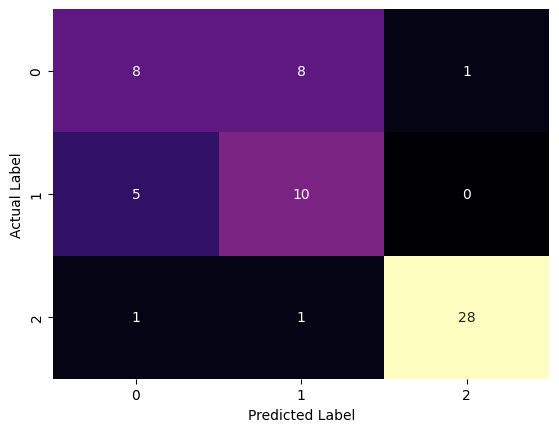

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test,prediction),
            annot=True,fmt='d',cbar=False,
            cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

In [ ]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74      0.74        62



5.B.Clearly showcase improvement in performance achieved

In [237]:
from sklearn.model_selection import cross_val_score

neighbors = list(range(1, 50, 2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=15, scoring='accuracy')
    cv_scores.append(scores.mean())


mse = [1 - x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

The optimal number of neighbors is 1


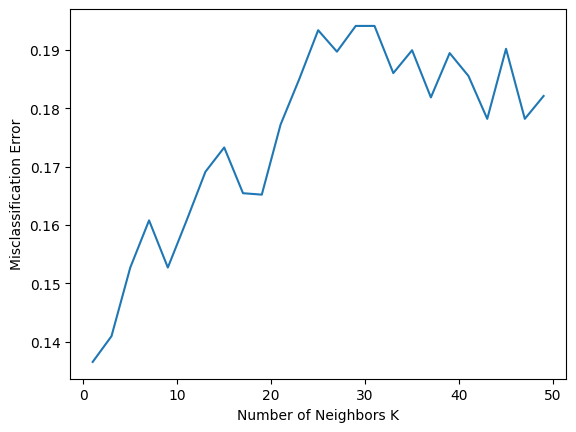

In [238]:
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

With Cross validation we are getting best K value as 1

5.C. Clearly state which parameters contributed most to improve model performance

For the classification/prediction of patient, this model is suitable when used with k value as 5.
This model is having good accuracy of 0.74 for test data
precision and recall high score for all classes which signifies that misclassification in terms of telling patient who is having disease as not having is less and also chances of telling patient that he is not having a disease as having is less.

**Part B - Banking, Marketing**

1. Data Understanding and Preparation

1.A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables

In [239]:
%cd /content/gdrive/My Drive/Colab Notebooks/
df_data1 = pd.read_csv("Marketing_Data1.csv")
df_data2 = pd.read_csv("Marketing_Data2.csv")

/content/gdrive/My Drive/Colab Notebooks


1.B. Print shape and Column Names and DataTypes of both the Dataframes

In [240]:
print("shape of dataframe 1: ", df_data1.shape)
print("shape of dataframe 2: ", df_data2.shape)

print("column names and datatype of dataframe 1")
print("-------------------------------------------")
df_data1.info()
print("-------------------------------------------")
print("column names and datatype of dataframe 2")
print("-------------------------------------------")
df_data2.info()

shape of dataframe 1:  (5000, 8)
shape of dataframe 2:  (5000, 7)
column names and datatype of dataframe 1
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
-------------------------------------------
column names and datatype of dataframe 2
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries

2.C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [241]:
df_all = pd.merge(df_data1,df_data2, on='ID') 
df_all.shape

(5000, 14)

2.D. Change Datatype of below features to ‘Object’.
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’

In [242]:
for i in ['HiddenScore','Level' , 'Security' , 'FixedDepositAccount' , 'InternetBanking'  , 'CreditCard' ]:
    df_all[i]=df_all[i].astype('category')

In [243]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   float64 
dtypes: category(6), float64(2), int64(6)
memory usage: 381.7 KB


2.Data Exploration and Analysis

2.A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

In [244]:
df_all.isnull().values.sum()

df_all = df_all.dropna(axis = 0, how ='any')

df_all.shape


(4980, 14)

In [245]:
df_all.isnull().values.sum()

0

In [247]:
df_all['LoanOnCard'].unique()

array([1., 0.])

In [246]:
df_all['LoanOnCard'].value_counts(normalize=True)


0.000000   0.903614
1.000000   0.096386
Name: LoanOnCard, dtype: float64

<Axes: xlabel='LoanOnCard', ylabel='count'>

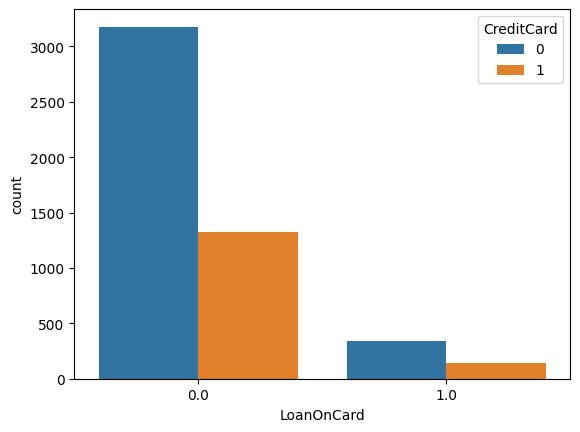

In [248]:
sns.countplot(x="LoanOnCard", hue="CreditCard", data=df_all)

Both people with credit card or not have got loan

In [250]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   4980 non-null   int64   
 1   Age                  4980 non-null   int64   
 2   CustomerSince        4980 non-null   int64   
 3   HighestSpend         4980 non-null   int64   
 4   ZipCode              4980 non-null   int64   
 5   HiddenScore          4980 non-null   category
 6   MonthlyAverageSpend  4980 non-null   float64 
 7   Level                4980 non-null   category
 8   Mortgage             4980 non-null   int64   
 9   Security             4980 non-null   category
 10  FixedDepositAccount  4980 non-null   category
 11  InternetBanking      4980 non-null   category
 12  CreditCard           4980 non-null   category
 13  LoanOnCard           4980 non-null   float64 
dtypes: category(6), float64(2), int64(6)
memory usage: 509.2 KB


<Figure size 1000x500 with 0 Axes>

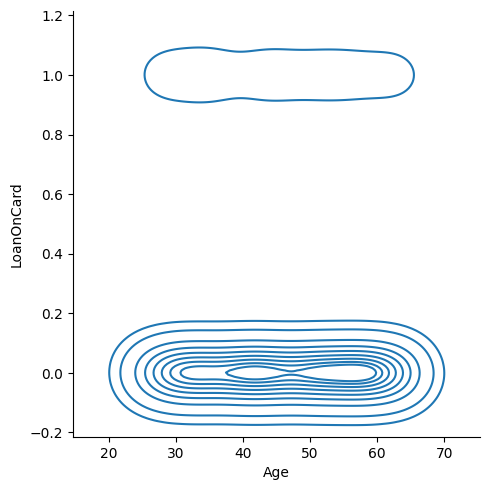

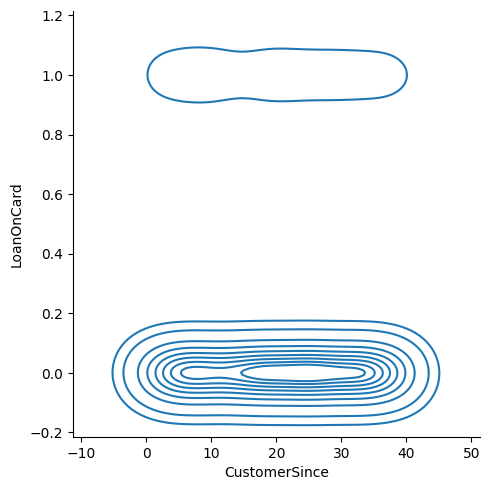

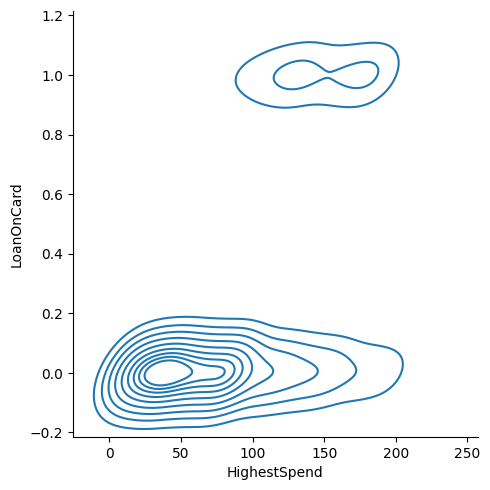

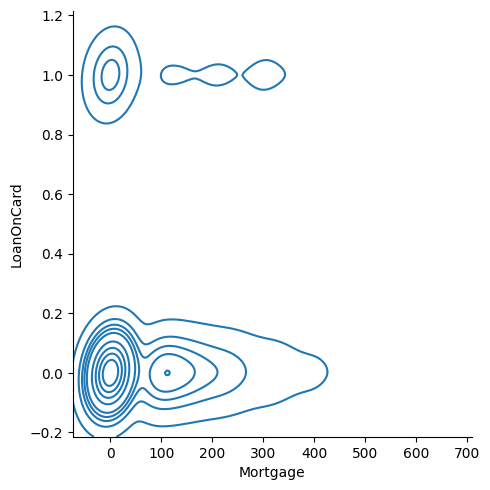

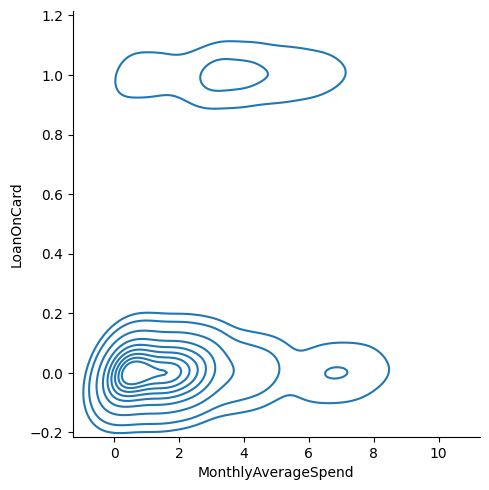

In [256]:
plt.figure(figsize=(10,5))

sns.displot(data=df_all, x='Age', y='LoanOnCard', kind='kde')
plt.show()
sns.displot(data=df_all, x='CustomerSince', y='LoanOnCard', kind='kde')
plt.show()
sns.displot(data=df_all, x='HighestSpend', y='LoanOnCard', kind='kde')
plt.show()
sns.displot(data=df_all, x='Mortgage', y='LoanOnCard', kind='kde')
plt.show()
sns.displot(data=df_all, x='MonthlyAverageSpend', y='LoanOnCard', kind='kde')
plt.show()


<ipython-input-272-ce5414ab18cf>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_all.corr(), fmt = ".2f",annot=True,lw=1,cmap = 'coolwarm')


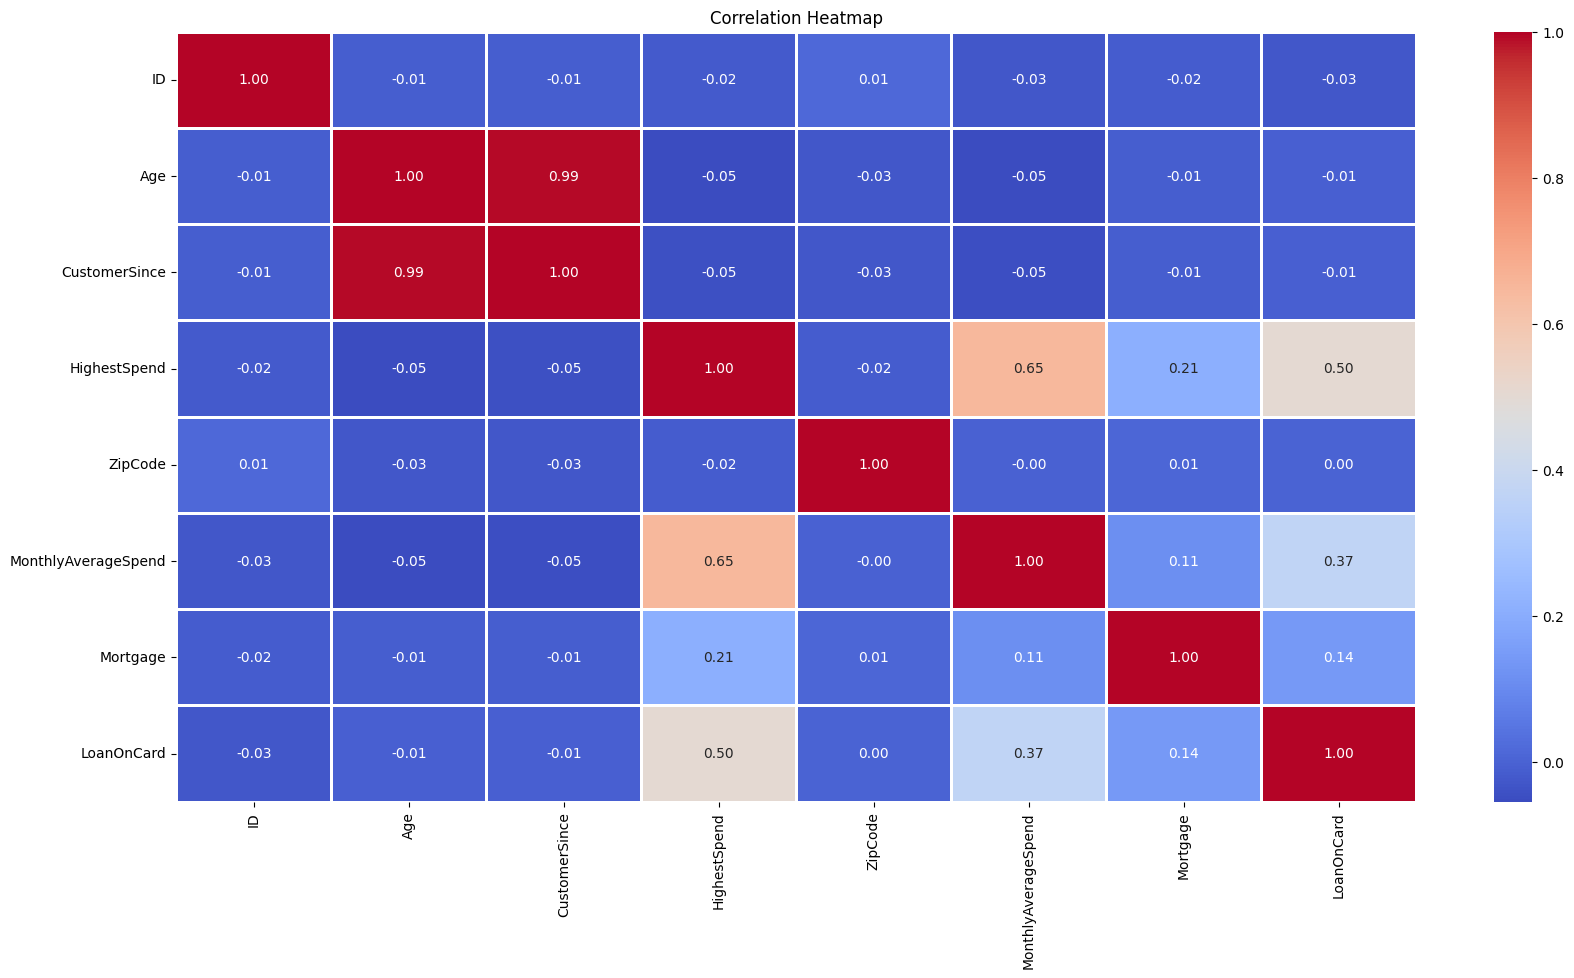

In [272]:
import seaborn as sns
%matplotlib inline

plt.figure(dpi = 100,figsize=(20,10))
sns.heatmap(df_all.corr(), fmt = ".2f",annot=True,lw=1,cmap = 'coolwarm')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

From above set of graph we can observe that 
1) ID column can be ignored as this variable is of no significance.
2) Zipcode is not having any correlation with the LoanOnCard variable.
3) Below mentioned variables are having low correlation with LoanOnCard variable
    CustomerSince
    HiddenScore
    
    

2. B. Check the percentage of missing values and impute if required

In [257]:
df_all_2 = pd.merge(df_data1,df_data2, on='ID') 
df_all_2.shape


df_missing = df_all_2.isna();
df_missing.head()

df_sum_missing = df_missing.sum()
df_sum_missing

df_sum_missing/len(df_all_2)*100

df_missing['LoanOnCard'].value_counts()

df_missing['LoanOnCard'] = df_missing['LoanOnCard'].mode()[0]

df_missing['LoanOnCard'].value_counts()


False    5000
Name: LoanOnCard, dtype: int64

2.C.Check for unexpected values in each categorical variable and impute with best suitable value

In [258]:
df_all_2['HiddenScore'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64

In [259]:
df_all_2['Security'].value_counts()

0    4478
1     522
Name: Security, dtype: int64

In [260]:
df_all_2['Level'].value_counts()               

1    2096
3    1501
2    1403
Name: Level, dtype: int64

In [261]:
df_all_2['FixedDepositAccount'].value_counts()  

0    4698
1     302
Name: FixedDepositAccount, dtype: int64

In [262]:
df_all_2['CreditCard'].value_counts()  

0    3530
1    1470
Name: CreditCard, dtype: int64

In [263]:
df_all_2['InternetBanking'].value_counts()     

1    2984
0    2016
Name: InternetBanking, dtype: int64

3. Data Preparation and model building

3.A. Split data into X and Y. 

In [264]:
from sklearn.model_selection import train_test_split

3.A.Split data into X and Y (Recommended to drop ID & ZipCode. LoanOnCard is target Variable)

In [265]:
X=df_all_2.drop(['LoanOnCard', 'ID','ZipCode'], axis=1)

Y=df_all_2['LoanOnCard']

In [275]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns = X.columns

3.B.Split data into train and test. Keep 25% data reserved for testing

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.25, random_state=100)

print("Number of records after splitting X train: ", X_train.shape)
print("Number of records after splitting X test: ", X_test.shape)
print("Number of records after splitting y train: ", y_train.shape)
print("Number of records after splitting y test: ", y_test.shape)

Number of records after splitting X train:  (3750, 11)
Number of records after splitting X test:  (1250, 11)
Number of records after splitting y train:  (3750,)
Number of records after splitting y test:  (1250,)


In [277]:
y_test.to_frame().value_counts(normalize=True)

LoanOnCard
0.000000     0.891827
1.000000     0.108173
dtype: float64

In [278]:
y_train.to_frame().value_counts(normalize=True)

LoanOnCard
0.000000     0.907556
1.000000     0.092444
dtype: float64

3.C.Train a Supervised Learning Classification base model - Logistic Regression

impute data 

In [279]:
from sklearn.impute import SimpleImputer
rep_0=SimpleImputer(missing_values=0,strategy="mean")
cols=X_train.columns

X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))

X_train.columns =cols
X_test.columns = cols

X_train.head()

y_test = np.nan_to_num(y_test)
y_train = np.nan_to_num(y_train)


In [280]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3750, 11)
(1250, 11)
(3750,)
(1250,)


In [284]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


          0        1        2        3        4        5        6         7  \
0 -0.139772 0.330012 2.487317 0.746497 0.193388 1.433629 0.077421 -0.191019   

         8         9        10  intercept  
0 0.779207 -0.405525 -0.417629  -4.660741  


In [285]:
model_score_test=model.score(X_test,y_test)
print(model_score_test)

0.9392


In [286]:
model_score_train=model.score(X_train,y_train)
print(model_score_train)

0.9549333333333333


The model score for test data is 0.93 and for train data is 0.95 which is very good

In [290]:
print("Confusion matrix for test data")
cm_test = metrics.confusion_matrix(y_test,y_test_predict, labels=[1,0])
print(cm_test)

Confusion matrix for test data
[[  75   60]
 [  16 1099]]


<Axes: >

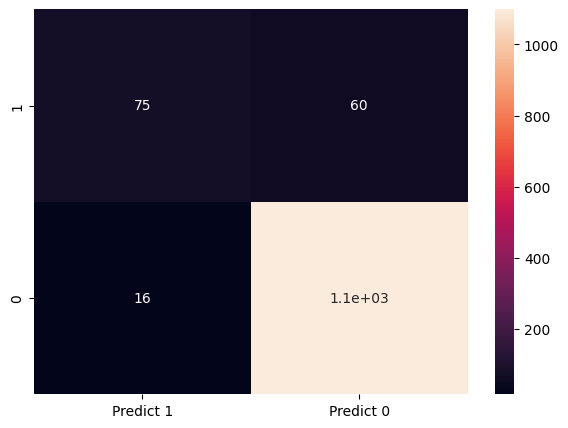

In [291]:
df_cm_test = pd.DataFrame(cm_test, index=[i for i in ["1","0"]], columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_test, annot=True)

The confusion matrix

True Positives (TP): predicted true conversion rate 75

True Negatives (TN): predicted false conversion rate 1099

False Positives (FP): 60 Falsely predict positive Type I error

False Negatives (FN): 16 Falsely predict negative Type II error

In [295]:
print("Confusion matrix for train data")
cm_train = metrics.confusion_matrix(y_train,y_train_predict, labels=[1,0])
print(cm_train)

Confusion matrix for train data
[[ 222  123]
 [  46 3359]]


<Axes: >

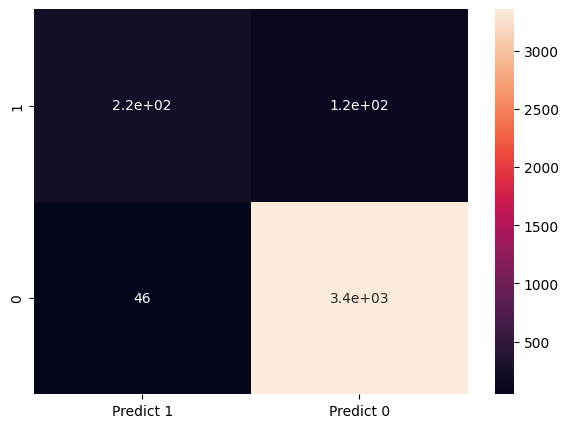

In [296]:
df_cm_train = pd.DataFrame(cm_train, index=[i for i in ["1","0"]], columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_train, annot=True)

3.D. Print evaluation metrics for the model and clearly share insights

In [292]:
print("Classification report for test data")
print(metrics.classification_report(y_test,y_test_predict, labels=[1,0]))

Classification report for test data
              precision    recall  f1-score   support

           1       0.82      0.56      0.66       135
           0       0.95      0.99      0.97      1115

    accuracy                           0.94      1250
   macro avg       0.89      0.77      0.82      1250
weighted avg       0.93      0.94      0.93      1250



In [293]:
print("Classification report for train data")
print(metrics.classification_report(y_train,y_train_predict, labels=[1,0]))

Classification report for train data
              precision    recall  f1-score   support

           1       0.83      0.64      0.72       345
           0       0.96      0.99      0.98      3405

    accuracy                           0.95      3750
   macro avg       0.90      0.81      0.85      3750
weighted avg       0.95      0.95      0.95      3750



As seen in the classification report, it is having high recall score which is required for this model since we don't want to loose a customer who is having potential to repay the loan
The recall is almost similar to that of the train model

The model is having good precision which signifies which customer to be avoided.

3. E. Balance the data using the right balancing technique

i. Check distribution of the target variable
ii. Say output is class A : 20% and class B : 80%
iii. Here you need to balance the target variable as 50:50.
iv. Try appropriate method to achieve the same

In [299]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=1)
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train,y_train)
print("Number of records oversample Data X: ", X_train_over.shape)
print("Number of records oversample Data y: ", y_train_over.shape)
print("Number of records split train Data X: ", X_train.shape)
print("Number of records split train Data y: ", y_train.shape)



Number of records oversample Data X:  (6810, 11)
Number of records oversample Data y:  (6810,)
Number of records split train Data X:  (3750, 11)
Number of records split train Data y:  (3750,)


3.F. Again train the same previous model on balanced data

In [300]:
model_over = LogisticRegression(solver='liblinear',random_state=1,max_iter=300)
model_over.fit(X_train_over, y_train_over)


LogisticRegression(max_iter=300, random_state=1, solver='liblinear')

In [301]:
y_train_over_predict = model_over.predict(X_train_over)

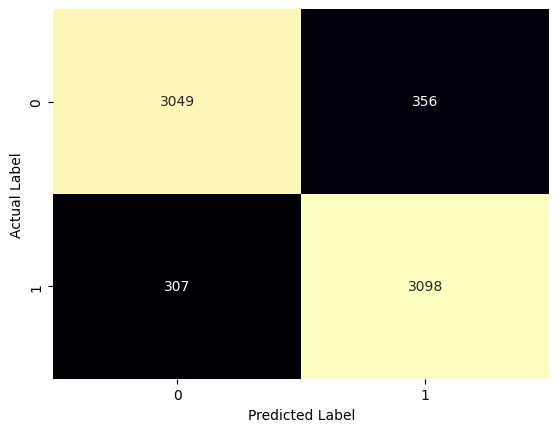

In [302]:
sns.heatmap(metrics.confusion_matrix(y_train_over,y_train_over_predict),annot=True,fmt='d',cbar=False,cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

In [304]:
print("classification for train data: ")
print(metrics.classification_report(y_train_over,y_train_over_predict))

classification for train data: 
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      3405
         1.0       0.90      0.91      0.90      3405

    accuracy                           0.90      6810
   macro avg       0.90      0.90      0.90      6810
weighted avg       0.90      0.90      0.90      6810



the precision of this model is very high 0.9, the recall is also high 0.9

prediction of loan and predictions on no defaults is both high


4. Performance Improvement

4. A. Train a base model each for SVM, KNN

KNN

In [310]:
knn = KNeighborsClassifier(n_neighbors= 5, weights = 'distance')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print("knn score for test data:")
knn.score(X_test, y_test)


knn score for test data:


0.9544

In [311]:
print("knn score for train data:")
knn.score(X_train,y_train)

knn score for train data:


1.0

Scores for both test & train are high, affirming the model applicability and better performance than Logistic Regression model

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

KNeighborsClassifier(weights='distance')

In [315]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
print(cm)


Confusion Matrix
[[  86   49]
 [   8 1107]]


Confusion Matrix


<Axes: >

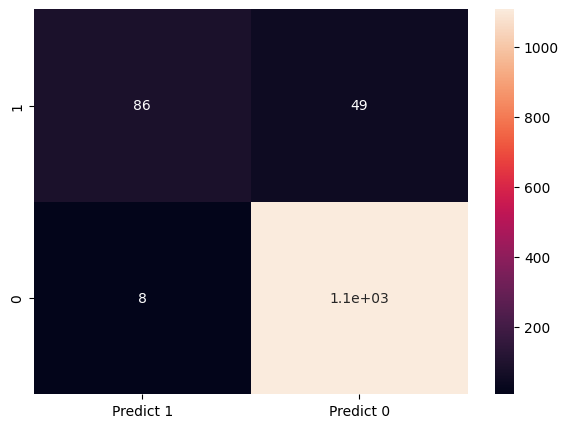

In [314]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

True Positive (TP): The model predicted 86 as loan holders and who are actually loan holders.

True Negative (TN): The model predicted 1107 as No loan holders and who are actually No loan holders.

False Positive (FP): The model predicted 49 as No loan holders and who are actually loan holders. (TYPE I error)

False Negative (FN): The model predicted 8 as loan holders and who are actually No loan holders. ((TYPE II error)

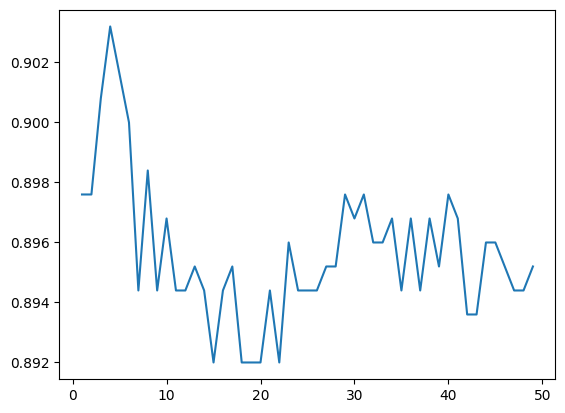

In [ ]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

plt.plot(range(1,50),scores)

4.B. Tune parameters for each of the models wherever required and finalize a model

In [305]:
grid={"penalty":["none","l2"], 'solver': ['newton-cg', 'lbfgs', 'saga']}
log_gridsearchcv=LogisticRegression(max_iter=1000,n_jobs=2)
grid_search=GridSearchCV(estimator = log_gridsearchcv, param_grid = grid, cv = 10)

In [306]:
grid_search.fit(X_train_over, y_train_over)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000, n_jobs=2),
             param_grid={'penalty': ['none', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'saga']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ", grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

tuned hpyerparameters :(best parameters)  {'penalty': 'none', 'solver': 'newton-cg'} 

LogisticRegression(max_iter=1000, n_jobs=2, penalty='none', solver='newton-cg')


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
print("accuracy :",grid_search.best_score_)

accuracy : 0.8820851688693099


Accuracy of this model is 0.88 which is v good

In [ ]:
grid_search.cv_results_['mean_test_score']

array([0.88208517, 0.88208517, 0.87547724, 0.88208517, 0.88164464,
       0.87547724])

In [ ]:
y_predict_grdcv = best_model.predict(X_test)
print(y_predict_grdcv.shape)

(1250,)


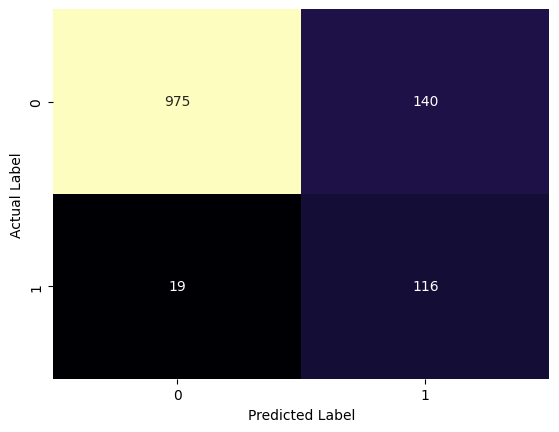

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test,y_predict_grdcv),annot=True,fmt='d',cbar=False,cmap='magma')

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

4.C. Print evaluation metrics for final model

In [ ]:
print(metrics.classification_report(y_test, y_predict_grdcv),'\n')

              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      1115
         1.0       0.45      0.86      0.59       135

    accuracy                           0.87      1250
   macro avg       0.72      0.87      0.76      1250
weighted avg       0.92      0.87      0.89      1250
 



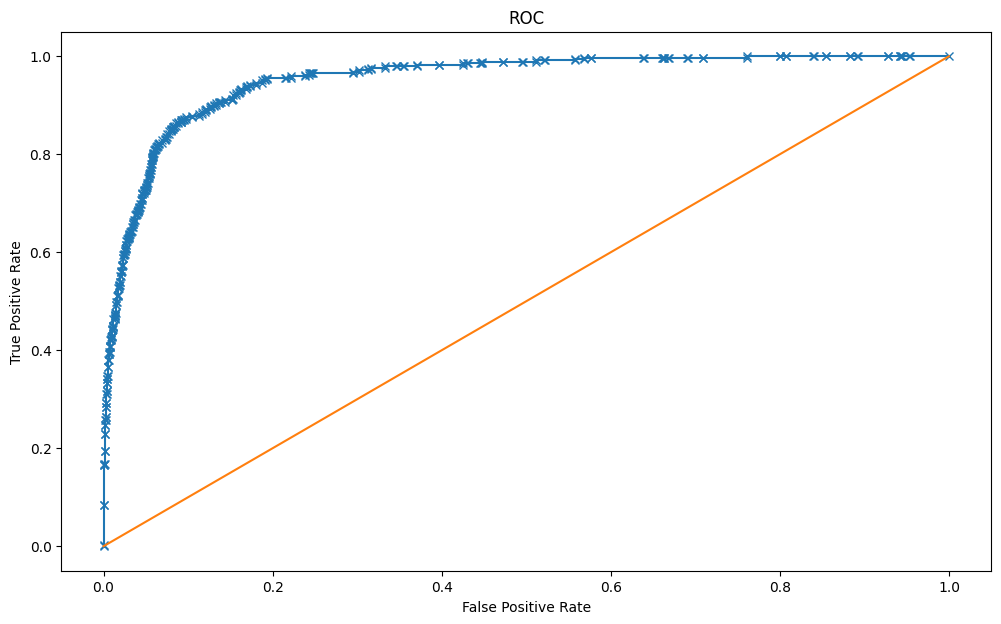

Area under Curve is 0.9526059290472237


In [ ]:
fpr,tpr,threshold = roc_curve(y_train,best_model.predict_proba(X_train)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Logistic Regression fit on training Data')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# cutoff = 0.5
# plt.text(0.18447285094406005,0.6550564872366209, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_model.predict_proba(X_train)[:,1]))

4.D. Share improvement achieved from base model to final model

The precision varied in knn model as compared to logistic regression, requiring more validation. The recall remained at same level. Logistic regression has better precision & recall. 

Type 1 & Type 2 error are less in logistic regression and this model will be best suited. It has also predicted true positive & true negative

Few customers does't have credit card but those customer having loan on card. This data error can be avoided.


